# Preprocessing the data
Data preprocessing transforms the data into a format that will be more easily and effectively processed with the data mining techniques and tools

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler,RobustScaler
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.preprocessing import MinMaxScaler

### Loading the data set
Showing the value of the flow with hourly mean

In [2]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow = flow.resample('60T').mean()

In [3]:
flow = flow.reset_index()

In [4]:
flow['time'] = flow['hour']
flow.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


In [5]:
flow['hour'] = (flow['hour'].dt.hour)

In [6]:
flow.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Filling the missing values with the mean of the data

In [7]:
flow = flow.fillna(flow.mean())

## Using different techniques for data preparation

### Standardization (or Z-score normalization)
properties of a standard normal distribution with μ=0 and σ=1

In [8]:
std = flow

In [9]:
std['zscore'] = zscore(std['flow'])

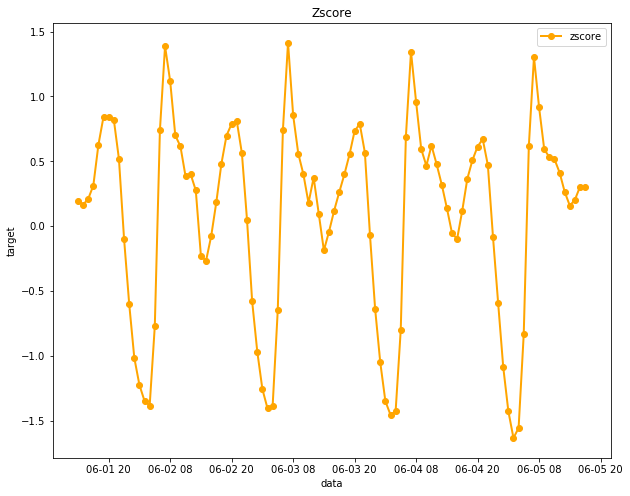

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:100],std['zscore'][:100], color="orange", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Zscore")
plt.legend()
plt.show()

### Min-Max Scaler
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one

In [11]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(std[['flow']])
std['min-max'] = scaled_df

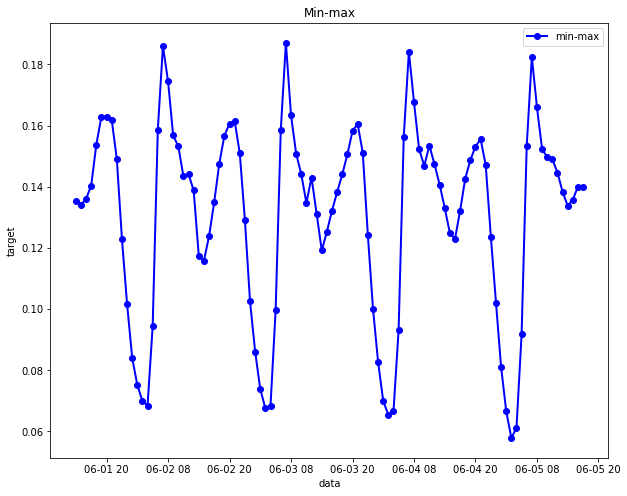

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:100],std['min-max'][:100], color="blue", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Min-max")
plt.legend()
plt.show()

### Robust scaler
Scale features using statistics that are robust to outliers

In [13]:
robust_scaler = RobustScaler()
rob = robust_scaler.fit_transform(std[['flow']])
rob = robust_scaler.transform(std[['flow']])
std['robust'] = rob

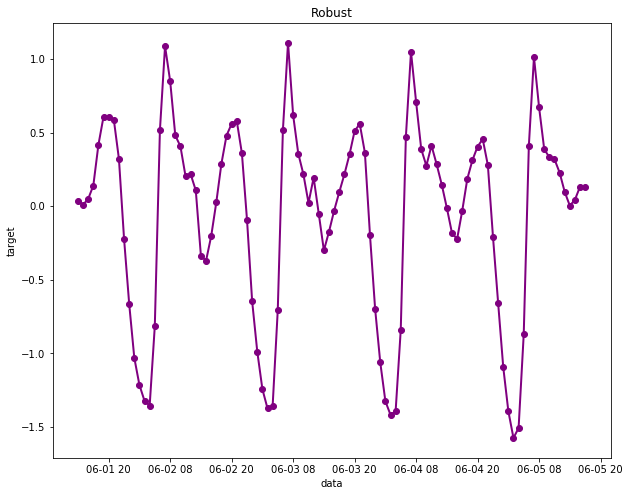

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:100],std['robust'][:100], color="purple", marker="o", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Robust")
plt.show()

### Comparing different methods of data preprocessing

In [15]:
std2 = std[['flow','time','zscore','min-max','robust']]
std2.head()

,flow,time,zscore,min-max,robust
0,113.754443,2015-06-01 14:00:00,0.196712,0.135434,0.037612
1,113.013333,2015-06-01 15:00:00,0.164946,0.134087,0.009605
2,114.081666,2015-06-01 16:00:00,0.210738,0.136029,0.049978
3,116.459167,2015-06-01 17:00:00,0.312647,0.140350,0.139825
4,123.825000,2015-06-01 18:00:00,0.628372,0.153740,0.418184


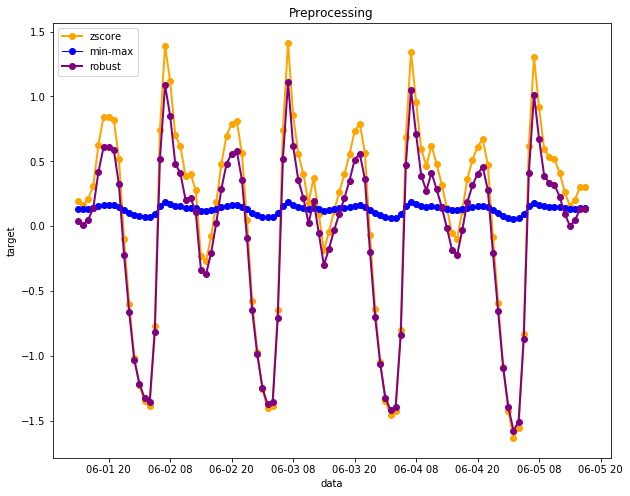

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(std['time'][:100],std['zscore'][:100], color="orange", marker="o",label="zscore", linewidth=2)
plt.plot(std['time'][:100],std['min-max'][:100], color="blue", marker="o",label="min-max", linewidth=1)
plt.plot(std['time'][:100],std['robust'][:100], color="purple", marker="o",label="robust", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Preprocessing")
plt.legend()
plt.show()